In [1]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import cv2
from urllib.request import urlretrieve
from google.colab.patches import cv2_imshow
import glob

# put all images into a list
imgs = [cv2.imread(file) for file in glob.glob("/content/gdrive/MyDrive/FYP/ICL_Panorama/*.jpg")]

# display the images in the notebook
# cv2_imshow(imgs[0])
# cv2_imshow(imgs[1])
# print(len(imgs))

# resize all images into 416x416
dim = (416, 416)
resized_imgs = [cv2.resize(imgs[i], dim, interpolation = cv2.INTER_AREA) for i in range(len(imgs))]
  
# display the resized images
# cv2_imshow(resized_imgs[0])
# cv2_imshow(resized_imgs[1337])

In [4]:
# divide images into mini batch (223 images per batch)
batch = [resized_imgs[x:x+223] for x in range(0, len(resized_imgs), 223)]

In [5]:
import torch
from IPython.display import clear_output

# Load the model from torch.hub
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/gdrive/MyDrive/FYP/YOLOv5/best.pt')

# confidence threshold (0-1)
model.conf = 0.5  

# Inference
result_batch1 = model(batch[0])
result_batch2 = model(batch[1])
result_batch3 = model(batch[2])
result_batch4 = model(batch[3])
result_batch5 = model(batch[4])
result_batch6 = model(batch[5])

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-25 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15

In [6]:
# Print out a summary of the inference of batch(1)
result_batch1.print()

image 1/223: 416x416 (no detections)
image 2/223: 416x416 (no detections)
image 3/223: 416x416 (no detections)
image 4/223: 416x416 (no detections)
image 5/223: 416x416 (no detections)
image 6/223: 416x416 (no detections)
image 7/223: 416x416 (no detections)
image 8/223: 416x416 (no detections)
image 9/223: 416x416 (no detections)
image 10/223: 416x416 (no detections)
image 11/223: 416x416 (no detections)
image 12/223: 416x416 1 steps
image 13/223: 416x416 1 steps
image 14/223: 416x416 (no detections)
image 15/223: 416x416 (no detections)
image 16/223: 416x416 1 steps
image 17/223: 416x416 (no detections)
image 18/223: 416x416 (no detections)
image 19/223: 416x416 (no detections)
image 20/223: 416x416 1 steps
image 21/223: 416x416 (no detections)
image 22/223: 416x416 (no detections)
image 23/223: 416x416 (no detections)
image 24/223: 416x416 (no detections)
image 25/223: 416x416 (no detections)
image 26/223: 416x416 (no detections)
image 27/223: 416x416 (no detections)
image 28/223: 4

In [7]:
# Print out a pandas table of the inference of batch(1)
result_batch1.pandas().xyxy[83]

,xmin,ymin,xmax,ymax,confidence,class,name


In [ ]:
import os 
import numpy as np
import pandas as pd 

# create the fold path to save
os.makedirs('/content/gdrive/MyDrive/FYP/YOLOv5', exist_ok=True) 

# initialise empty DataFrame
combined_result = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'num'])

# check if there is any step or ramp detected by the model, if detected, add them into the DataFream set
for i in range(len(result_batch1)):
  if result_batch1.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch1.pandas().xyxy[i].assign(num = i+1) ,ignore_index=True)
  if result_batch2.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch2.pandas().xyxy[i].assign(num = i+223+1) ,ignore_index=True)
  if result_batch3.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch3.pandas().xyxy[i].assign(num = i+223*2+1) ,ignore_index=True)
  if result_batch4.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch4.pandas().xyxy[i].assign(num = i+223*3+1) ,ignore_index=True)
  if result_batch5.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch5.pandas().xyxy[i].assign(num = i+223*4+1) ,ignore_index=True)
  if result_batch6.pandas().xyxy[i].empty == False:
    combined_result = combined_result.append(result_batch6.pandas().xyxy[i].assign(num = i+223*5+1) ,ignore_index=True)

# convert the combined DataFrame set to csv in pandas
combined_result.to_csv('/content/gdrive/MyDrive/FYP/YOLOv5/combined_result.csv')



In [ ]:
# sort by image number
sorted_combined_result = combined_result.sort_values(by=['num'])
sorted_combined_result.to_csv('/content/gdrive/MyDrive/FYP/YOLOv5/sorted_combined_result.csv')

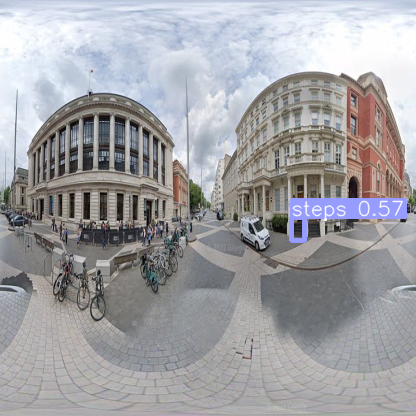

In [37]:
cv2_imshow(result_batch1.render()[11])